In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri May 18 22:30:19 2018

@author: mahfuz
"""
import pandas as pd
import numpy as np
import scipy.io as sio 
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt

import math
# read binary data
import os

In [2]:
font = {'size' : 21}
matplotlib.rc('font', **font)
matplotlib.rcParams['lines.linewidth'] = 2
directory = os.listdir('../chip02')
directory = os.listdir('../chip02')
print('../chip02/' + directory[0])
# read binary data
data = sio.loadmat('../chip02/' + directory[0])

../chip02/180522_ch02v050r29d3_int237_time10000.mat


In [3]:
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed May 23 13:11:32 2018',
 '__version__': '1.0',
 's0': array([[ 243.07692308,  243.10684392,  243.64167198, ...,  244.15370351,
          243.82716049,  243.67173202]]),
 's1': array([[ 233.95391996,  234.1989802 ,  234.17583938, ...,  232.82772713,
          232.97420573,  232.97878615]]),
 's10': array([[ 203.27295183,  203.62224208,  203.68524184, ...,  203.48937047,
          203.59425469,  203.71675635]]),
 's100': array([[ 256.19405889,  255.88425826,  256.07226208, ...,  254.44473074,
          254.41195414,  254.35734524]]),
 's101': array([[ 246.64890517,  246.64890517,  245.91184527, ...,  245.47375399,
          245.49918167,  245.19439674]]),
 's102': array([[ 260.51399301,  260.26795519,  260.52544795, ...,  257.93953114,
          257.94514584,  258.16431015]]),
 's103': array([[ 231.40011716,  231.5221851 ,  231.18342503, ...,  229.72684799,
          229.9095883 ,  230.01669319]]),
 

In [70]:

# Extract WID and RTN data
fmax_ary = np.array([])
dfof_ary = np.array([])
for key, value in data.items():
    if key[0] == '_':
        continue
    
    fmax_ary = np.append(fmax_ary, value.max())
    dfof_ary = np.append(dfof_ary, (value.max() - value.min()) / value.max())
    # use raw data
    # dfof_ary = np.append(dfof_ary, (value.max() - value.min()) / value.max() * 100)

wid_data = (fmax_ary - fmax_ary.mean()) / fmax_ary.mean() * 100
wid_pp = stats.probplot(wid_data)
# wid_pp = stats.probplot(fmax_ary)
rtn_pp = stats.probplot(dfof_ary)
dfof_ary.sort()
print(rtn_pp)

../chip02/180522_ch02v050r29d3_int237_time10000.mat
((array([-2.90572058, -2.61612003, -2.45268537, -2.33649744, -2.24526334,
       -2.16960037, -2.10463566, -2.04750083, -1.99635921, -1.94996125,
       -1.90741677, -1.86806838, -1.83141622, -1.79707104, -1.76472352,
       -1.73412365, -1.70506637, -1.67738128, -1.6509252 , -1.62557663,
       -1.60123151, -1.57780005, -1.55520416, -1.53337553, -1.51225401,
       -1.49178637, -1.47192527, -1.45262839, -1.43385775, -1.41557914,
       -1.39776162, -1.38037711, -1.36340005, -1.3468071 , -1.3305769 ,
       -1.31468982, -1.29912781, -1.28387421, -1.26891362, -1.25423178,
       -1.23981542, -1.22565222, -1.21173072, -1.19804017, -1.18457057,
       -1.17131252, -1.15825722, -1.14539641, -1.13272231, -1.1202276 ,
       -1.10790537, -1.0957491 , -1.08375264, -1.07191015, -1.06021612,
       -1.04866529, -1.03725272, -1.02597367, -1.01482365, -1.0037984 ,
       -0.99289383, -0.98210606, -0.9714314 , -0.96086629, -0.95040737,
       -0.

In [5]:
	rtn_pp_arr = np.c_[rtn_pp[0][1], rtn_pp[0][0]]

In [6]:
rtn_pp_arr

array([[ 0.0080455 , -2.90572058],
       [ 0.00905646, -2.61612003],
       [ 0.00948734, -2.45268537],
       [ 0.0094933 , -2.33649744],
       [ 0.00949814, -2.24526334],
       [ 0.0094992 , -2.16960037],
       [ 0.00951737, -2.10463566],
       [ 0.00982238, -2.04750083],
       [ 0.00997821, -1.99635921],
       [ 0.01000425, -1.94996125],
       [ 0.01007968, -1.90741677],
       [ 0.0100891 , -1.86806838],
       [ 0.01015944, -1.83141622],
       [ 0.01037558, -1.79707104],
       [ 0.01041035, -1.76472352],
       [ 0.01043617, -1.73412365],
       [ 0.01045449, -1.70506637],
       [ 0.01051727, -1.67738128],
       [ 0.01051829, -1.6509252 ],
       [ 0.01068939, -1.62557663],
       [ 0.01070897, -1.60123151],
       [ 0.0108453 , -1.57780005],
       [ 0.01090241, -1.55520416],
       [ 0.01092634, -1.53337553],
       [ 0.01092797, -1.51225401],
       [ 0.0110043 , -1.49178637],
       [ 0.01111497, -1.47192527],
       [ 0.01114183, -1.45262839],
       [ 0.01119014,

In [61]:
df = pd.DataFrame(rtn_pp_arr)

In [59]:
df

,0,1
0,0.008045,-2.905721
1,0.009056,-2.616120
2,0.009487,-2.452685
3,0.009493,-2.336497
4,0.009498,-2.245263
5,0.009499,-2.169600
6,0.009517,-2.104636
7,0.009822,-2.047501
8,0.009978,-1.996359
9,0.010004,-1.949961


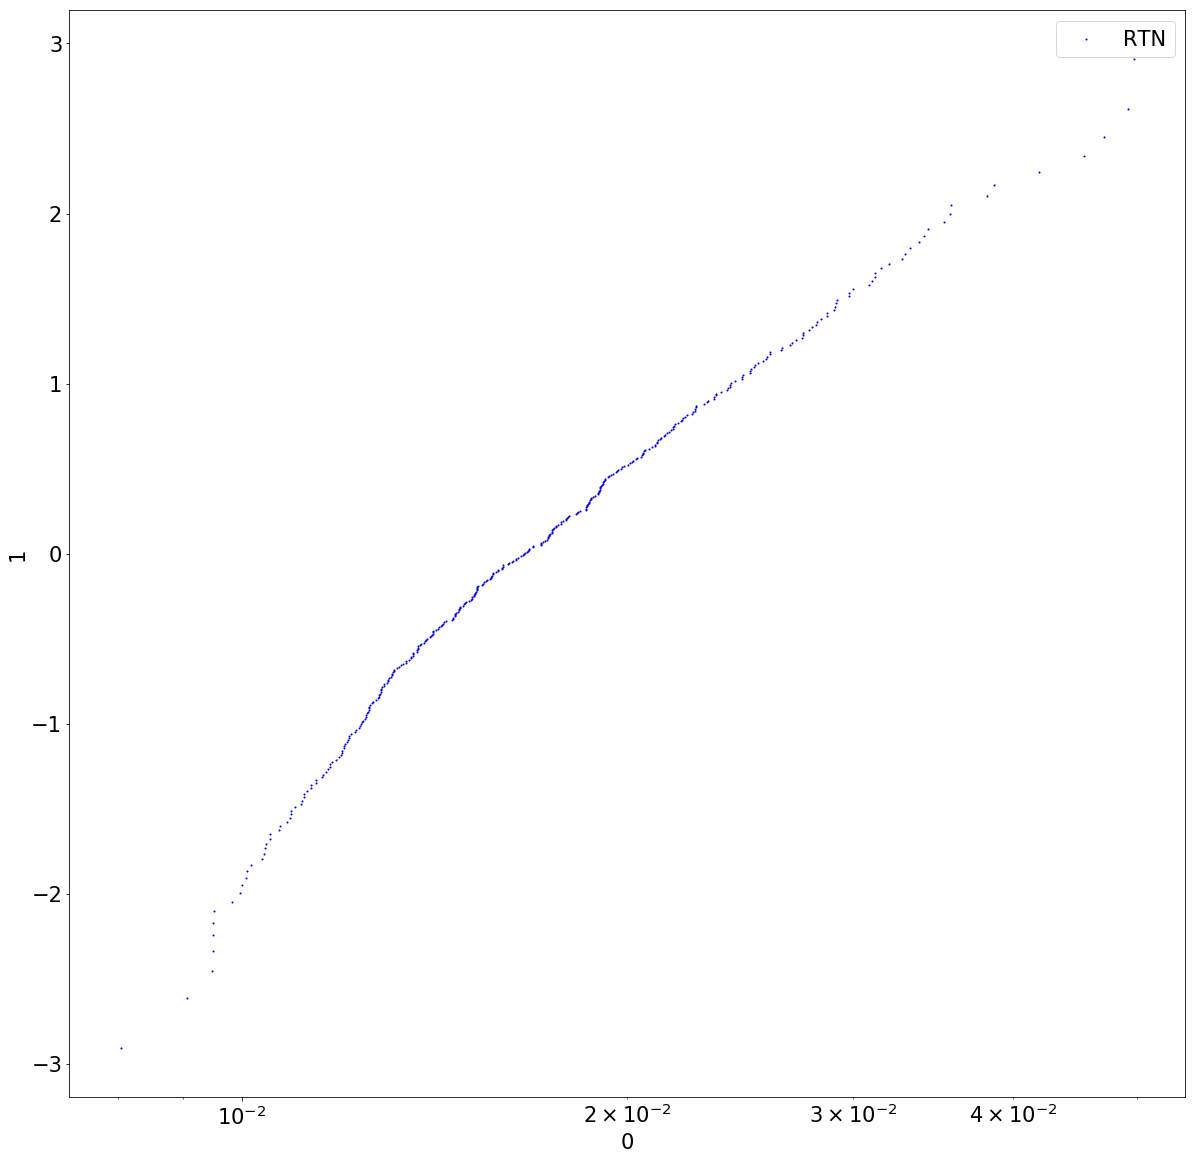

In [57]:
fig, ax = plt.subplots()
plt.xscale("log")
df.plot.scatter(0,1, s=1, label='RTN', ax=ax, color='blue', figsize=(20,20))

for k, v in df.iterrows():
             ax.annotate(k,xy=(v[0],v[1]),size=0.5, fontsize=1)
plt.savefig("./hoge.pdf")

<Figure size 432x288 with 0 Axes>

# Note for shaping data
## 20180607 Kanbayashi

In [17]:
type(rtn_pp[0][1])

numpy.ndarray

In [20]:
rtn_pp[0][0].shape

(378,)

In [21]:
df = pd.DataFrame({'x':rtn_pp[0][0], 'y':rtn_pp[0][1]})

In [22]:
df

,x,y
0,-2.905721,0.008045
1,-2.616120,0.009056
2,-2.452685,0.009487
3,-2.336497,0.009493
4,-2.245263,0.009498
5,-2.169600,0.009499
6,-2.104636,0.009517
7,-2.047501,0.009822
8,-1.996359,0.009978
9,-1.949961,0.010004


In [23]:
df = pd.DataFrame({'y':rtn_pp[0][0], 'x':rtn_pp[0][1]})

In [24]:
df

,x,y
0,0.008045,-2.905721
1,0.009056,-2.616120
2,0.009487,-2.452685
3,0.009493,-2.336497
4,0.009498,-2.245263
5,0.009499,-2.169600
6,0.009517,-2.104636
7,0.009822,-2.047501
8,0.009978,-1.996359
9,0.010004,-1.949961


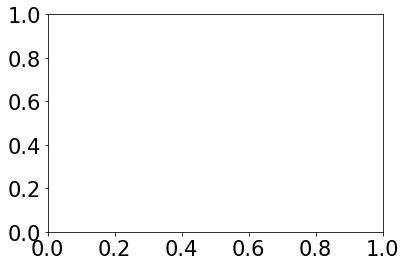

In [25]:
fig, ax = plt.subplots()

In [26]:
df.plot('x','y',kind='scatter',ax=ax)

In [27]:
for k, v in df.iterrows():
    ax.annotate(k,xy=(v['x'],v['y']),size=1)

In [29]:
plt.show()

In [31]:
%matplotlib inline

In [32]:
df.plot('x','y',kind='scatter',ax=ax)

In [33]:
plt.show()

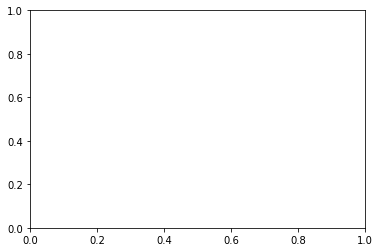

In [34]:
fig, ax = plt.subplots()

In [35]:
plt.show()

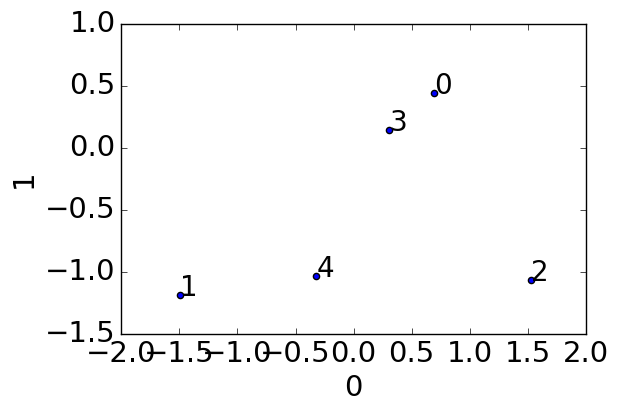

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(5,2))

fig, ax = plt.subplots()
df.plot(0,1,kind='scatter',ax=ax)

for k, v in df.iterrows():
             ax.annotate(k,xy=(v[0],v[1]),size=20)

plt.show()

In [40]:
np.random.randn(5,2)

array([[ 0.32424621, -0.15262408],
       [ 0.27052373, -0.10665128],
       [ 1.56140217,  0.90540351],
       [ 0.51892174, -0.77419556],
       [ 1.26488018,  1.59061075]])

In [41]:
df = pd.DataFrame({'y':rtn_pp[0][0], 'x':rtn_pp[0][1]})

In [42]:
array = np.c_[rtn_pp[0][0], rtn_pp[0][1]]

In [44]:
array = np.c_[rtn_pp[0][1], rtn_pp[0][0]]

In [45]:
df = pd.DataFrame(array)

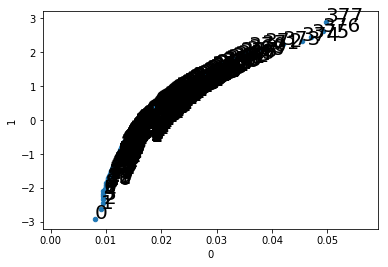

In [46]:
fig, ax = plt.subplots()
df.plot(0,1,kind='scatter',ax=ax)

for k, v in df.iterrows():
             ax.annotate(k,xy=(v[0],v[1]),size=20)

plt.show()